In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [498]:
df=pd.read_csv("train.csv")

In [499]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [500]:
df.shape

(891, 12)

In [501]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking number of NULL values

In [502]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [503]:
df.drop_duplicates(inplace=True)

#### Since the Cabin column has more than 75% NULL values Dropping the entire column

In [504]:
df.drop(['Cabin'],axis=1,inplace=True)

#### Using Multivariate approach

In [554]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols]


In [507]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
Y=impute_it.fit_transform(X)
Y

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       ...,
       [ 1.        , 23.45      , 26.82938751],
       [ 0.        , 30.        , 26.        ],
       [ 0.        ,  7.75      , 32.        ]])

In [508]:
print(Y.mean())
print(Y.std())


20.759466484518178
32.99832385700894


In [509]:
df[cols]=Y

#### Drops Embarked NA values (2 Rows)

In [510]:
df.dropna(inplace=True)

Description of values of dataframe

In [511]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.505180,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.429100,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,-6.389193,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Replacing negative age with 0

In [512]:
df.loc[df['Age']<0]=0

#### Number of Passengers in Each Class

In [514]:
df['Pclass'].value_counts()

Pclass
3    484
1    214
2    184
0      7
Name: count, dtype: int64

Text(0, 0.5, 'Number of Passengers')

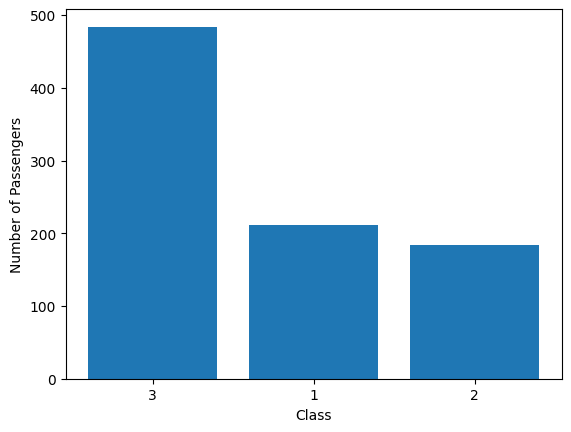

In [556]:
y=df['Pclass'].value_counts().tolist()
x=['3','1','2']
plt.bar(x,y[:3])
plt.xlabel('Class')
plt.ylabel('Number of Passengers')

#### Distribution of Age

(array([ 57.,  33., 171., 324., 142.,  74.,  50.,  25.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

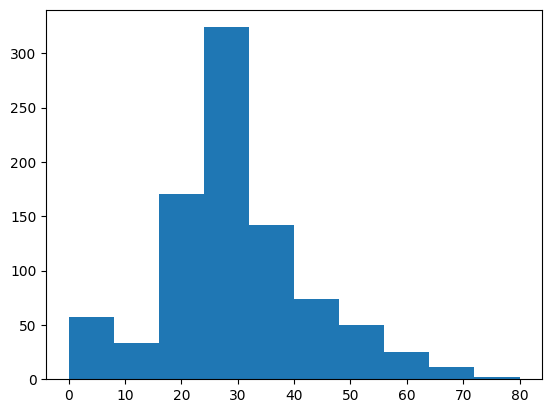

In [516]:
plt.hist(df['Age'])

#### Distribution by gender

In [517]:
df['Sex'].value_counts()
df=df[df['Sex'] !=0]

Text(0.5, 1.0, 'Distribution by Gender')

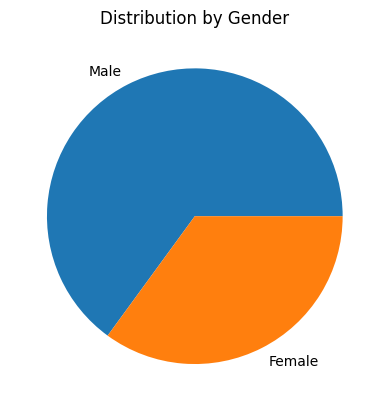

In [518]:
plt.pie(df['Sex'].value_counts(),labels=['Male','Female'])
plt.title('Distribution by Gender')


#### Box Plot of Fare

{'whiskers': [<matplotlib.lines.Line2D at 0x21677bff950>,
 'caps': [<matplotlib.lines.Line2D at 0x21679c051d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2167a715310>],
 'medians': [<matplotlib.lines.Line2D at 0x21679c06150>],
 'fliers': [<matplotlib.lines.Line2D at 0x2167a65a7d0>],
 'means': []}

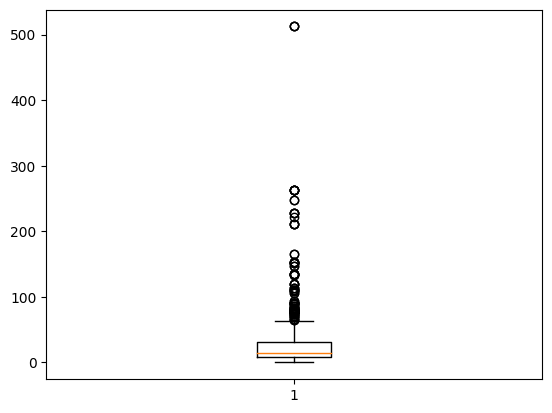

In [519]:
plt.boxplot(df['Fare'])

There is one outlier having fare greater than 500 and hence removing it

In [522]:
df = df[df['Fare'] != df['Fare'].max()]

Replacing Male=1 and Female=0 to create correlation between numerical values of the dataset

In [525]:
df['Sex']=df['Sex'].map(dict(male=1, female=0))

#### Heatmap of the Correlation

<Axes: >

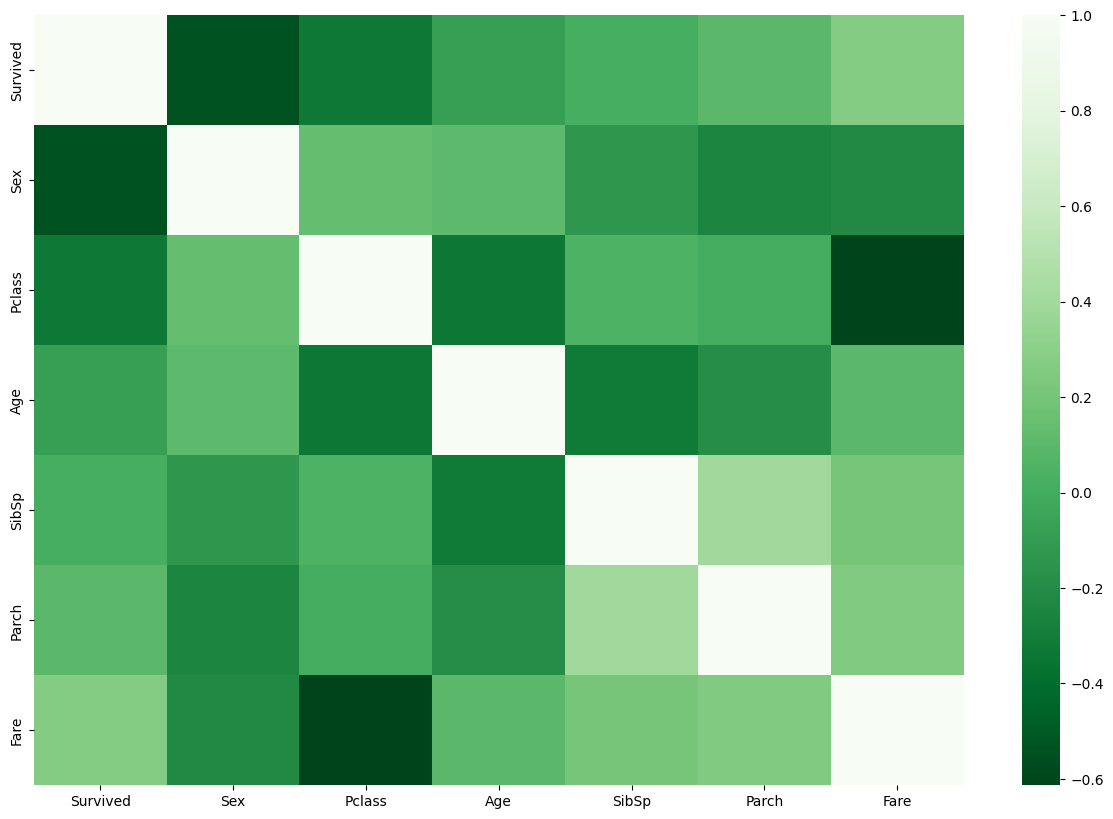

In [527]:
z=df[['Survived','Sex','Pclass','Age','SibSp','Parch','Fare']]
plt.figure(figsize=(15,10))
sns.heatmap(z.corr(),cmap='Greens_r')

The correlation between (Sex,Survived) and (Pclass,Fare) is high

e:\code\myenv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


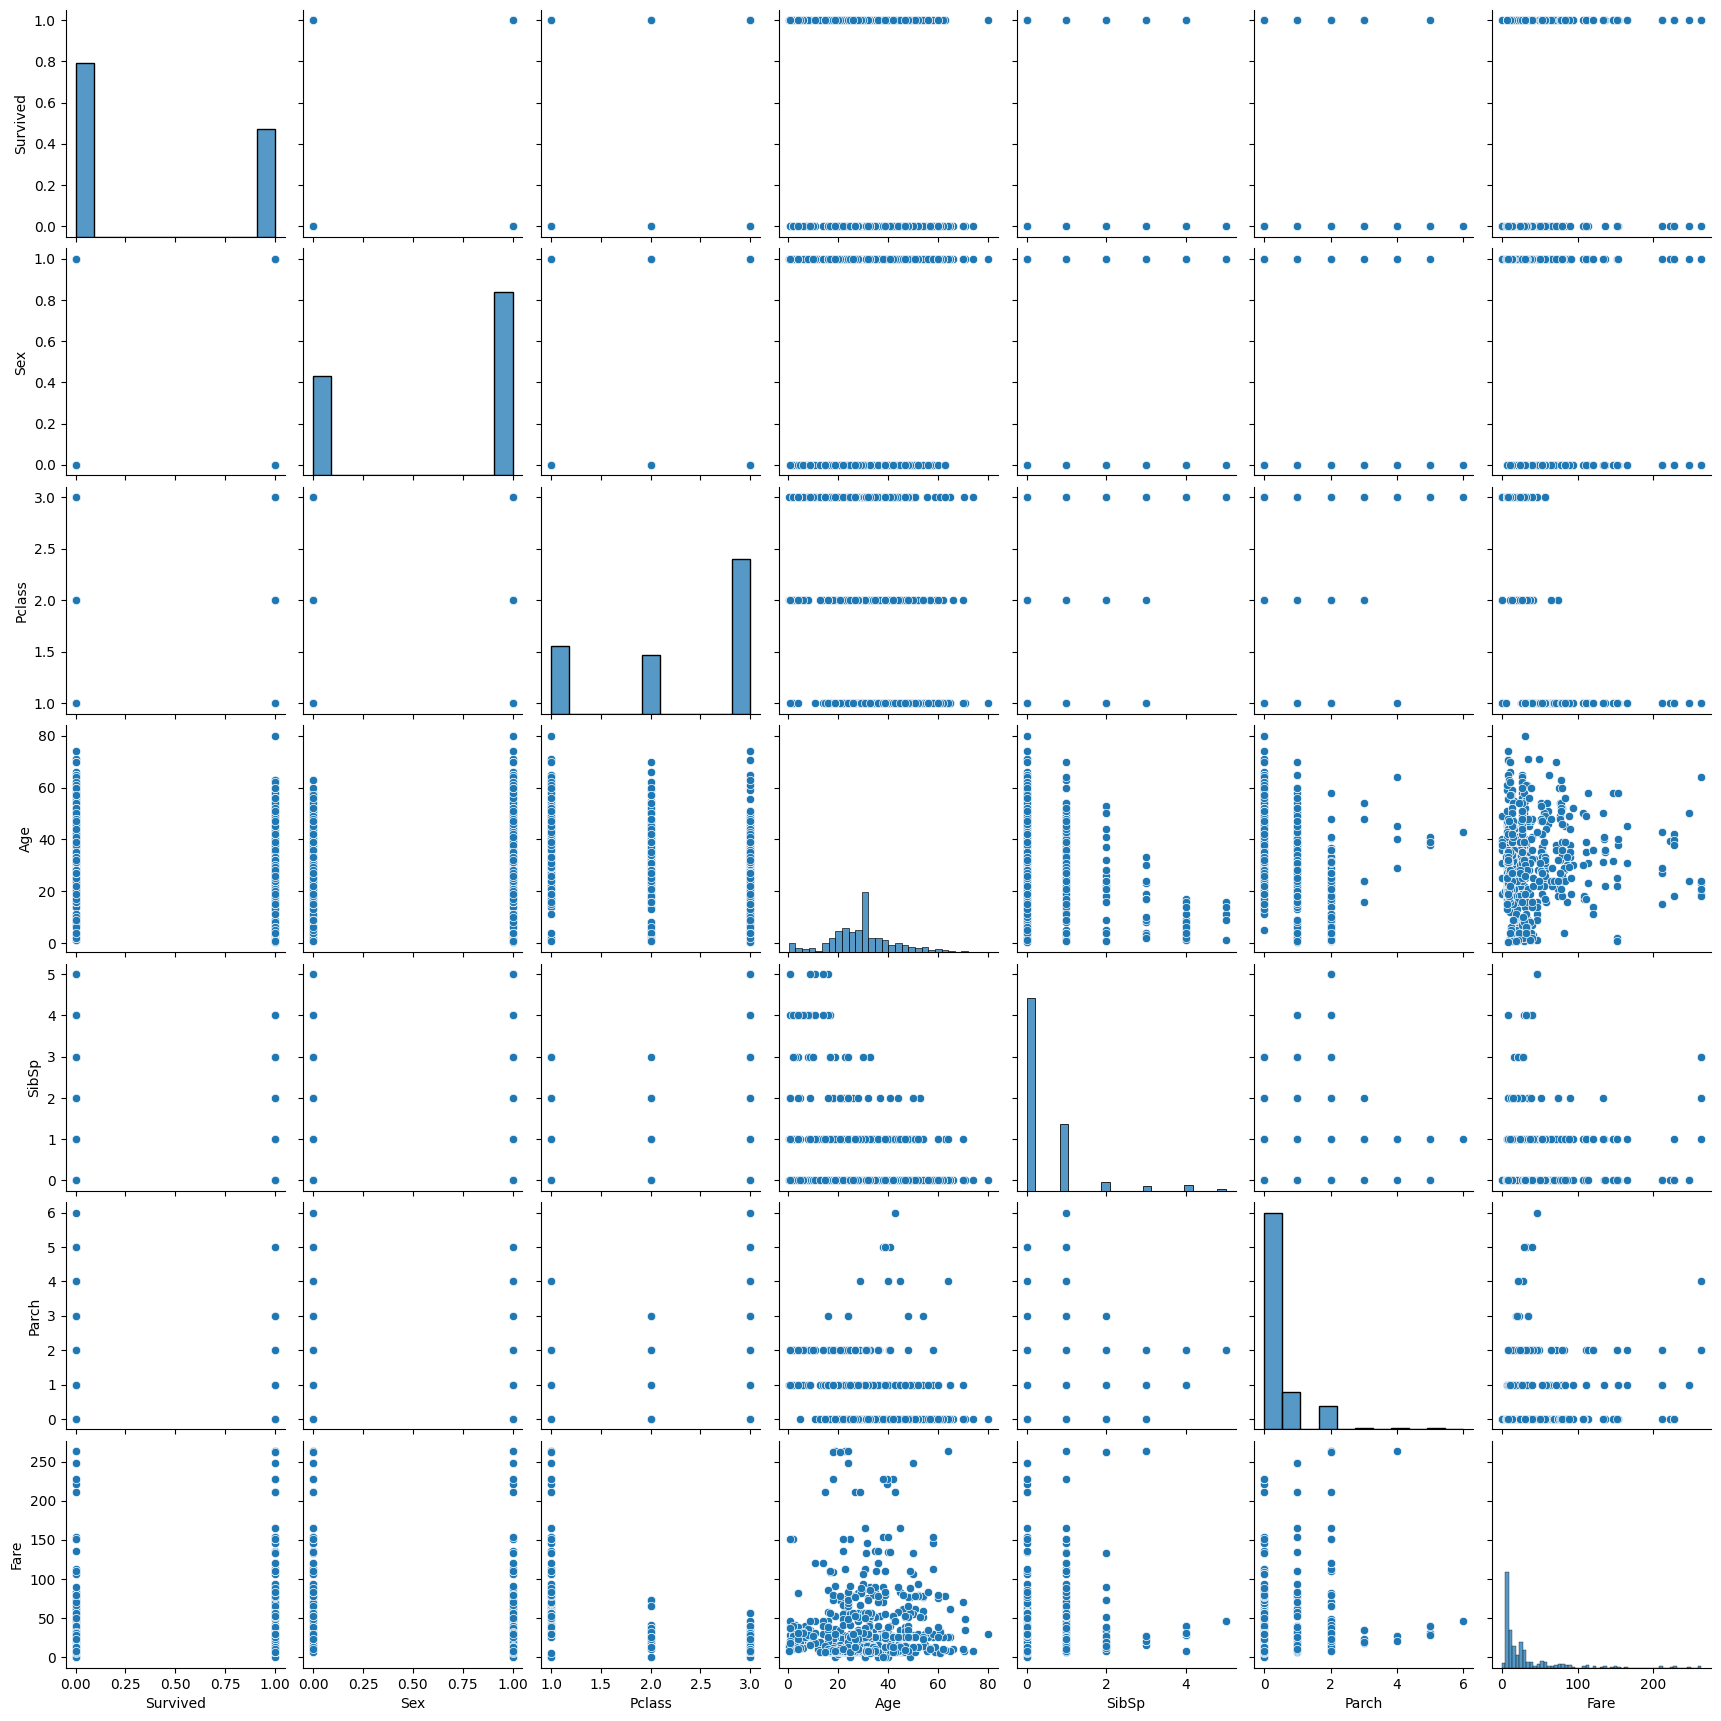

In [528]:
sns.pairplot(z)

#### Violin Plots of Age vs Class

Text(0.5, 1.0, '3rd Class')

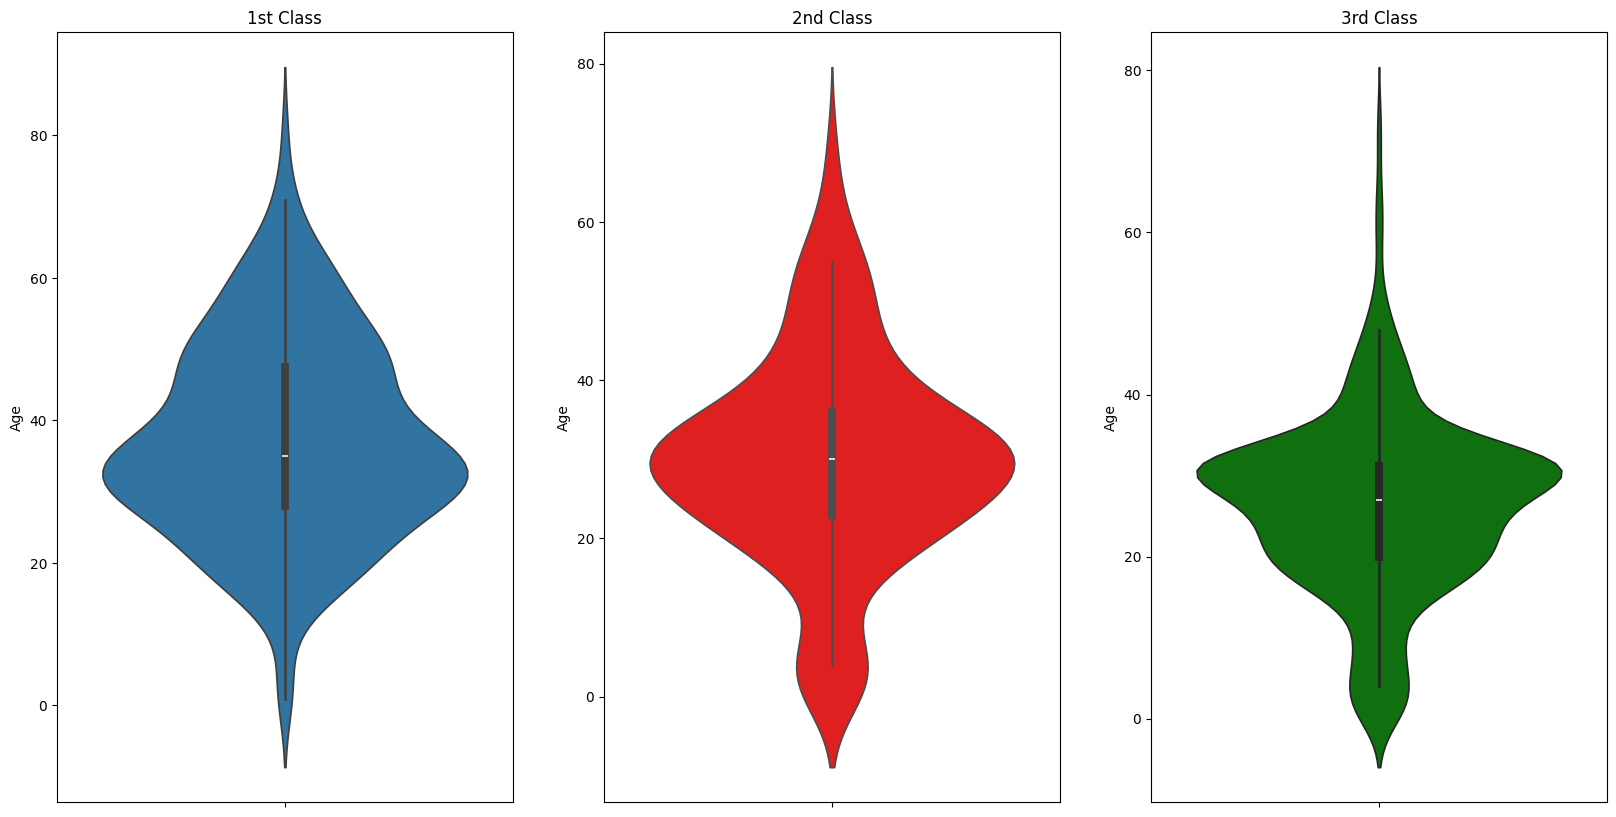

In [529]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,10))
ax=ax.flatten()
sns.violinplot(df['Age'][df['Pclass']==1],ax=ax[0])
sns.violinplot(df['Age'][df['Pclass']==2],ax=ax[1],color='red')
sns.violinplot(df['Age'][df['Pclass']==3],ax=ax[2],color='green')
ax[0].set_title('1st Class')
ax[1].set_title('2nd Class')
ax[2].set_title('3rd Class')


The age for people in 3rd class is relatively low compared to 1st and 2nd class

#### Number of people Survived/Not Survived per Class

<Axes: xlabel='Pclass', ylabel='count'>

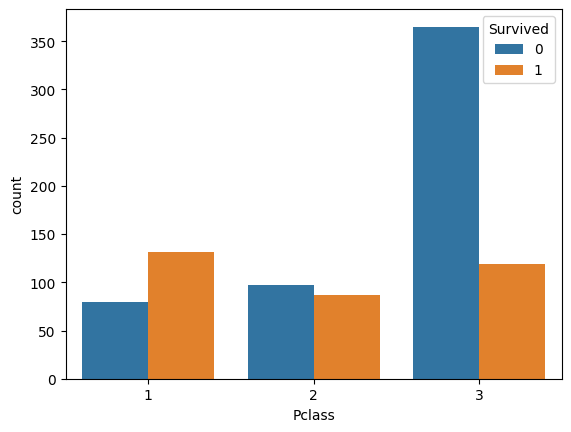

In [530]:
sns.countplot(df,x=df['Pclass'],hue=df['Survived'])

#### Distribution by Class

Text(0.5, 1.0, 'Distribution by Class')

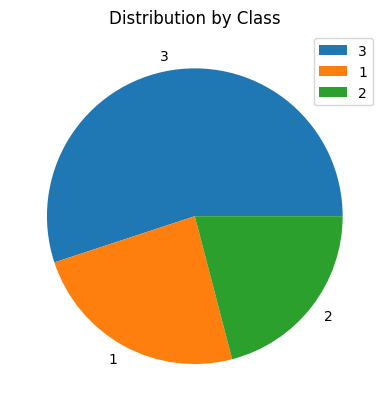

In [531]:
plt.pie(df['Pclass'].value_counts(),labels=[3,1,2])
plt.legend()
plt.title('Distribution by Class')

#### Range of fare and density of people

<Axes: xlabel='Fare', ylabel='Density'>

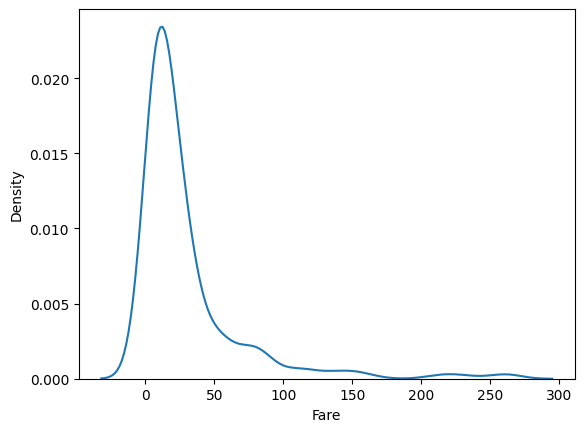

In [532]:
sns.kdeplot(df['Fare'])

Majority of people travelled in low Fare

#### Distribution of age by Class

<Axes: xlabel='Age', ylabel='Count'>

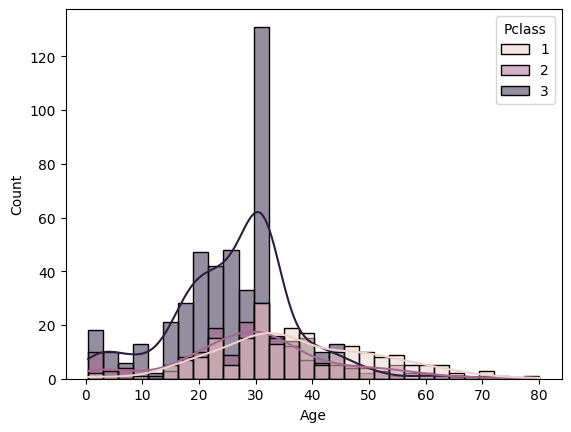

In [533]:
sns.histplot(hue = df["Pclass"], x = df["Age"], kde=True)

Anomaly at age=30 due to replacing NULL values using multivariation

#### % of people that survived in each class

Text(0, 0.5, 'Number of Passengers')

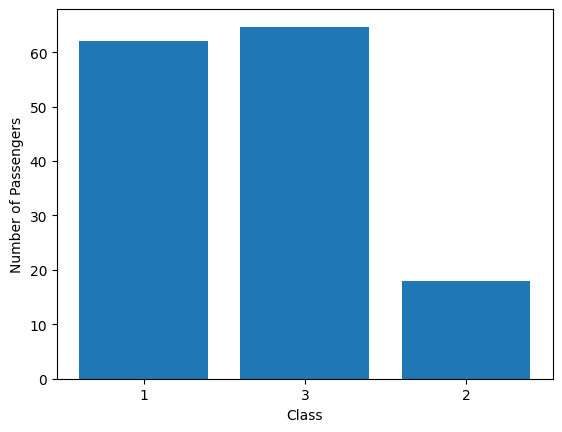

In [552]:
total=df['Pclass'].value_counts().tolist()
y=df['Pclass'][df['Survived']==1].value_counts().tolist()
y[0]=y[0]*100/211
y[1]=y[1]*100/184
y[2]=y[2]*100/484
x=['1','3','2']
plt.bar(x,y)
plt.xlabel('Class')
plt.ylabel('Number of Passengers')